In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

df = pd.read_csv('BRA.csv')
df.head()


,Country,League,Season,Date,Time,Home,Away,HG,AG,Res,PH,PD,PA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA
0,Brazil,Serie A,2012,19/05/2012,22:30,Palmeiras,Portuguesa,1.0,1.0,D,1.75,3.86,5.25,1.76,3.87,5.31,1.69,3.50,4.90
1,Brazil,Serie A,2012,19/05/2012,22:30,Sport Recife,Flamengo RJ,1.0,1.0,D,2.83,3.39,2.68,2.83,3.42,2.70,2.59,3.23,2.58
2,Brazil,Serie A,2012,20/05/2012,01:00,Figueirense,Nautico,2.0,1.0,H,1.60,4.04,6.72,1.67,4.05,7.22,1.59,3.67,5.64
3,Brazil,Serie A,2012,20/05/2012,20:00,Botafogo RJ,Sao Paulo,4.0,2.0,H,2.49,3.35,3.15,2.49,3.39,3.15,2.35,3.26,2.84
4,Brazil,Serie A,2012,20/05/2012,20:00,Corinthians,Fluminense,0.0,1.0,A,1.96,3.53,4.41,1.96,3.53,4.41,1.89,3.33,3.89


In [52]:
df.columns = ['Paĩs',  'Liga', 'Temporada', 'Data', 'Horário', 'TimeCasa', 'TimeFora', 'GolsCasa', 'GolsFora', 'Res', 'ChanceCasa', 'ChanceEmpate', 'ChanceFora', 'MaxH', 'MaxD', 'MaxA', 'AvgH', 'AvgD', 'AvgA']
df.head()

,Paĩs,Liga,Temporada,Data,Horário,TimeCasa,TimeFora,GolsCasa,GolsFora,Res,ChanceCasa,ChanceEmpate,ChanceFora,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA
0,Brazil,Serie A,2012,19/05/2012,22:30,Palmeiras,Portuguesa,1.0,1.0,D,1.75,3.86,5.25,1.76,3.87,5.31,1.69,3.50,4.90
1,Brazil,Serie A,2012,19/05/2012,22:30,Sport Recife,Flamengo RJ,1.0,1.0,D,2.83,3.39,2.68,2.83,3.42,2.70,2.59,3.23,2.58
2,Brazil,Serie A,2012,20/05/2012,01:00,Figueirense,Nautico,2.0,1.0,H,1.60,4.04,6.72,1.67,4.05,7.22,1.59,3.67,5.64
3,Brazil,Serie A,2012,20/05/2012,20:00,Botafogo RJ,Sao Paulo,4.0,2.0,H,2.49,3.35,3.15,2.49,3.39,3.15,2.35,3.26,2.84
4,Brazil,Serie A,2012,20/05/2012,20:00,Corinthians,Fluminense,0.0,1.0,A,1.96,3.53,4.41,1.96,3.53,4.41,1.89,3.33,3.89


In [53]:
# Pré-processamento dos dados
df = df[['Temporada', 'TimeCasa', 'TimeFora', 'GolsCasa', 'GolsFora', 'Res', 'ChanceCasa', 'ChanceEmpate', 'ChanceFora']]
df['Res'] = df['Res'].map({'H': 'Vitória', 'D': 'Empate', 'A': 'Derrota'})


In [54]:
# Verificar se há valores ausentes e tratar, se necessário
df.isnull().sum()
df = df.dropna()

In [45]:
# Selecionar as características relevantes para a previsão
features = ['TimeCasa', 'TimeFora', 'ChanceCasa', 'ChanceFora', 'GolsCasa', 'GolsFora']
target = 'Res'

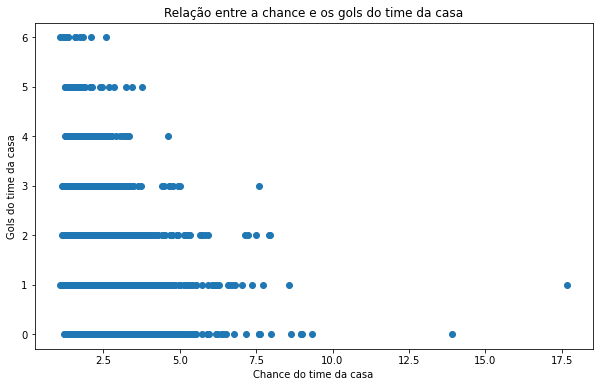

In [55]:
# Análise exploratória dos dados
plt.figure(figsize=(10, 6))
plt.scatter(df['ChanceCasa'], df['GolsCasa'])
plt.xlabel('Chance do time da casa')
plt.ylabel('Gols do time da casa')
plt.title('Relação entre a chance e os gols do time da casa')
plt.show()

In [57]:
# Divisão dos dados em treinamento e teste
X = df[['Temporada', 'ChanceCasa', 'ChanceEmpate', 'ChanceFora']]
y = df['Res']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
# Treinamento do modelo de regressão logística
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [59]:
# Avaliação do modelo
y_pred = model.predict(X_test)
print("Acurácia do modelo: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print(classification_report(y_test, y_pred))

Acurácia do modelo: 50.94%
              precision    recall  f1-score   support

     Derrota       0.44      0.21      0.28       212
      Empate       0.00      0.00      0.00       216
     Vitória       0.52      0.92      0.66       426

    accuracy                           0.51       854
   macro avg       0.32      0.38      0.31       854
weighted avg       0.37      0.51      0.40       854



/home/diogo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/diogo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/diogo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [60]:
# Previsão do campeão
chances_campeao = pd.DataFrame()
chances_campeao['Time'] = df['TimeCasa'].unique()
chances_campeao['ChanceCampeao'] = 0

In [61]:
for time in chances_campeao['Time']:
    # Calcular a pontuação esperada para cada time
    chances_campeao.loc[chances_campeao['Time'] == time, 'ChanceCampeao'] = model.predict_proba([[2023, 0, 0, 0]])[0][1]

/home/diogo/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/diogo/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/diogo/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/diogo/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/diogo/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/diogo/.local/lib/python3.10/site-packages/sklearn

In [62]:
# Ordenar os times por chance de ser campeão
chances_campeao = chances_campeao.sort_values('ChanceCampeao', ascending=False)

In [63]:
# Imprimir os resultados
print(chances_campeao)

              Time  ChanceCampeao
0        Palmeiras       0.304831
19          Gremio       0.304831
21        Criciuma       0.304831
22     Atletico-PR       0.304831
23           Goias       0.304831
24  Chapecoense-SC       0.304831
25            Avai       0.304831
26       Joinville       0.304831
27      Santa Cruz       0.304831
28      America MG       0.304831
29          Parana       0.304831
30           Ceara       0.304831
31    Athletico-PR       0.304831
32             CSA       0.304831
33       Fortaleza       0.304831
34      Bragantino       0.304831
35          Cuiaba       0.304831
20         Vitoria       0.304831
18      Fluminense       0.304831
1     Sport Recife       0.304831
17       Sao Paulo       0.304831
2      Figueirense       0.304831
3      Botafogo RJ       0.304831
4      Corinthians       0.304831
5    Internacional       0.304831
6      Ponte Preta       0.304831
7            Bahia       0.304831
8         Cruzeiro       0.304831
9            V

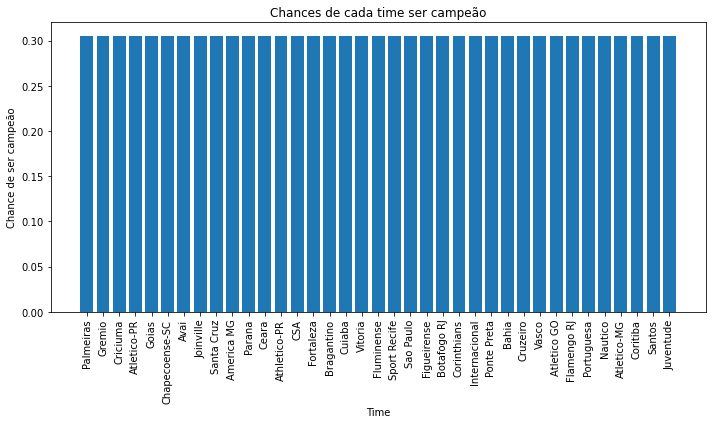

In [64]:
# Gráfico de barras das chances de ser campeão
plt.figure(figsize=(10, 6))
plt.bar(chances_campeao['Time'], chances_campeao['ChanceCampeao'])
plt.xlabel('Time')
plt.ylabel('Chance de ser campeão')
plt.title('Chances de cada time ser campeão')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [65]:
# Calcular o total de gols feitos por cada time
gols_por_time = df.groupby('TimeCasa')['GolsCasa'].sum() + df.groupby('TimeFora')['GolsFora'].sum()


In [66]:
# Ordenar os times por total de gols
gols_por_time = gols_por_time.sort_values(ascending=False)

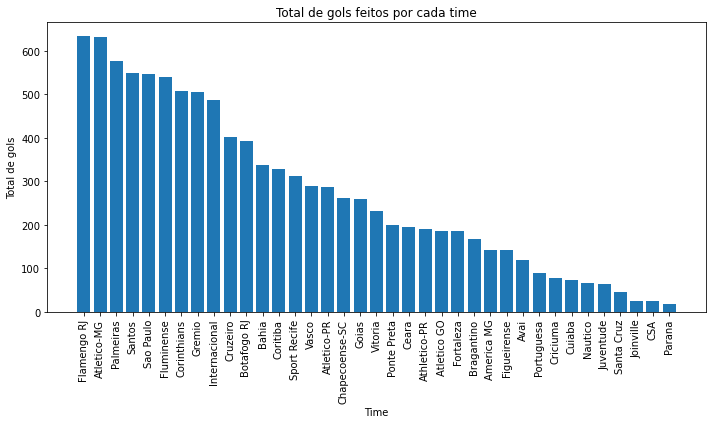

In [67]:
# Criar o gráfico ordenado
plt.figure(figsize=(10, 6))
plt.bar(gols_por_time.index, gols_por_time.values)
plt.xlabel('Time')
plt.ylabel('Total de gols')
plt.title('Total de gols feitos por cada time')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [68]:
# Filtrar apenas as vitórias
vitorias = df[df['Res'] == 'Vitória']

In [69]:
# Contar o número de vitórias por time
vitorias_por_time = vitorias['TimeCasa'].value_counts() + vitorias['TimeFora'].value_counts()

In [70]:
# Ordenar os times por número de vitórias
vitorias_por_time = vitorias_por_time.sort_values(ascending=False)

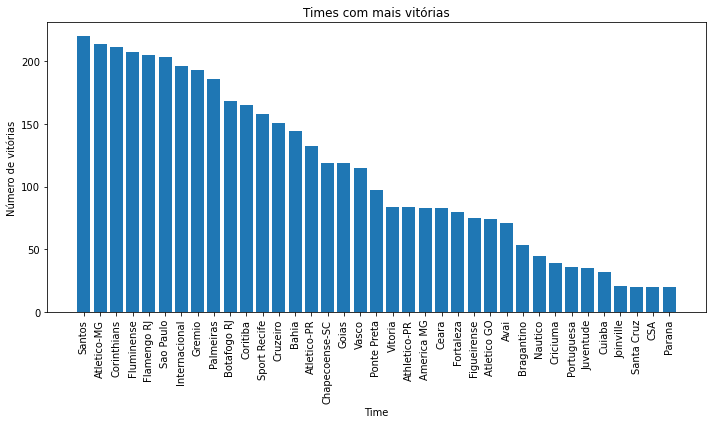

In [71]:
# Criar o gráfico
plt.figure(figsize=(10, 6))
plt.bar(vitorias_por_time.index, vitorias_por_time.values)
plt.xlabel('Time')
plt.ylabel('Número de vitórias')
plt.title('Times com mais vitórias')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()